### LTV
Valor monetário trazido pelo cliente durante o tempo de relacionamento com a getrak

In [0]:
%sql
-- centrais com mais de 10000 veiculos (portes premium)
SELECT
  a.sistema,
  a.meses_desde_criacao,
  a.quantidade_veiculos_ativos,
  sum(f.valor_total) as ltv,
  ((SUM(f.valor_total) / NULLIF(a.meses_desde_criacao, 0))/nullif(a.quantidade_veiculos_ativos,0)) as valor_medio_por_veiculo
FROM gold.central a
LEFT JOIN gold.financeiro f ON a.sistema = f.sistema
where a.status = 'Ativo' and a.quantidade_veiculos_ativos > 10000
group by all

sistema,meses_desde_criacao,quantidade_veiculos_ativos,ltv,valor_medio_por_veiculo
pontotrack,118,14559,null,null
admassistencia,94,15166,null,null
smithseg,100,21276,null,null
cartracking,87,29019,null,null
infinitysystem,62,27039,840759.14,0.5015211838574867
seguraveiculos,116,15239,1705858.4400000004,0.9650027040420339
aguiasat,127,16310,1433745.7800000003,0.6921727069524036
localiza,29,45580,null,null
rotasystem,106,17611,391327.5,0.2096285769078717
tatoassist,61,16371,4176895.950000001,4.182621959462505


In [0]:
%python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%sql
SELECT
  a.sistema,
  a.meses_desde_criacao,
  a.quantidade_veiculos_ativos,
  round(sum(f.valor_total),2) as ltv,
  round(sum(f.Plataforma),2) as ltv_plataforma,
  round(sum(f.Equipamentos),2) as ltv_equipamento,
  round(sum(f.Conectividade),2) as ltv_conectividade,
  round(((sum(f.valor_total)/nullif(a.meses_desde_criacao,0))/nullif(a.quantidade_veiculos_ativos,0)),2) as ltv_por_veiculo
FROM gold.central a
LEFT JOIN gold.financeiro f ON a.sistema = f.sistema
WHERE a.status = 'Ativo' --and a.sistema not in ('apvs','localiza') --and a.quantidade_veiculos_ativos < 10000 
GROUP BY a.sistema, a.meses_desde_criacao, a.quantidade_veiculos_ativos

sistema,meses_desde_criacao,quantidade_veiculos_ativos,ltv,ltv_plataforma,ltv_equipamento,ltv_conectividade,ltv_por_veiculo
helfenrastreadores,65,1421,1404035.87,102000.4,158580.6,158564.83,15.2
wklsatce,76,196,null,null,null,null,null
autocontrole,125,237,540714.14,292541.52,29435.68,215416.94,18.25
simseguranca,8,269,11060.6,11060.6,0.0,0.0,5.14
autoprotector,113,1512,341631.41,341573.71,0.0,57.7,2.0
radsgestao,18,74,32487.87,13945.99,13847.04,4694.84,24.39
ciclo,20,168,19866.19,19866.19,0.0,0.0,5.91
wdrastreadores,11,36,13928.69,7387.04,4744.0,1797.65,35.17
megasonic,36,118,64181.29,1647.1,4975.49,1515.97,15.11
gpscar,124,643,740363.3,545596.87,95487.93,68062.0,9.29


In [0]:
%sql
with freq as (
    SELECT 
        c.sistema,
        f.data_pagamento,
        LAG(f.data_pagamento) OVER (PARTITION BY c.sistema ORDER BY f.data_pagamento) AS pagamento_anterior,
        DATEDIFF(f.data_pagamento, LAG(f.data_pagamento) OVER (PARTITION BY c.sistema ORDER BY f.data_pagamento)) AS diff
    FROM silver.sensedata_financeiro f
    LEFT JOIN gold.central c ON c.codigo_central = f.codigo_central
    where f.data_pagamento >= add_months(current_date(), -6)
    --WHERE c.sistema = 'jrx'
),
freq2 as (
    select sistema, avg(f.diff) as diff from freq f group by all
),
Saldos AS (
    SELECT 
        site_sis AS sistema,
        MAX(CASE WHEN data_referencia = CURRENT_DATE THEN quantidade_saldo_acumulado END) AS Saldo_Atual,
        MAX(CASE WHEN data_referencia = DATEADD(day, -365, CURRENT_DATE) THEN quantidade_saldo_acumulado END) AS Saldo_Ano_Passado
    FROM gold.vinculo_desvinculo_consolidado
    WHERE data_referencia = CURRENT_DATE
        OR data_referencia = DATEADD(day, -365, CURRENT_DATE)
    GROUP BY site_sis
),
ultima_data_mes AS (
    SELECT 
        sistema,
        mes_ano_pagamento,
        sum(valor_total) as valor_total,
        sum(Plataforma) as valor_plataforma,
        last_day(to_date(mes_ano_pagamento, 'MM/yyyy')) AS data_pagamento
    FROM gold.financeiro
    group by all
)
SELECT
    a.sistema,
    a.perfil,
    a.categoria_porte_empresa,
    f.classificacao,
    a.meses_desde_criacao,
    --a.quantidade_veiculos_ativos,
    round(avg(fr.diff),2) as freq_pagamento,
    round(AVG(u.valor_total),1) AS media_receita_mensal, --média mensal dos ultimos 6 meses
    round(avg(u.valor_plataforma)/nullif(a.quantidade_veiculos_ativos,0),2) as receita_mensal_por_veiculo,
    (s.Saldo_Atual - s.Saldo_Ano_Passado) / NULLIF(s.Saldo_Ano_Passado, 0) AS Taxa_Variacao_YTD
FROM gold.central a
LEFT JOIN gold.financeiro f ON a.sistema = f.sistema
LEFT JOIN freq2 fr on a.sistema = fr.sistema
LEFT JOIN Saldos s ON a.sistema = s.sistema
LEFT JOIN ultima_data_mes u on u.sistema = a.sistema
WHERE a.status = 'Ativo' and a.sistema not in ('apvs','localiza') and u.data_pagamento >= add_months(current_date(), -6)
GROUP BY a.sistema, a.perfil, a.categoria_porte_empresa, f.classificacao, a.meses_desde_criacao, a.quantidade_veiculos_ativos, s.Saldo_Atual, s.Saldo_Ano_Passado

sistema,perfil,categoria_porte_empresa,classificacao,meses_desde_criacao,freq_pagamento,media_receita_mensal,receita_mensal_por_veiculo,Taxa_Variacao_YTD
equiptracker,RASTREAMENTO,Pequeno,B,52,31.5,1217.4,5.56,0.1774193548387097
altheriatracking,RASTREAMENTO,Iniciante,B,50,14.36,1550.6,26.81,0.13157894736842105
terremoto,RASTREAMENTO,Médio,A,49,7.7,8941.7,4.78,0.06654676258992806
aet,RASTREAMENTO,Médio,A,72,14.0,8678.1,2.91,0.25024630541871923
jkveiculos,RASTREAMENTO,Iniciante,C,45,13.82,785.5,49.57,-0.13333333333333333
agaperastreamento,RASTREAMENTO,Pequeno,B,25,8.25,4076.0,6.01,0.04205607476635514
lcmrastreamento,REVENDA,Pequeno,C,24,31.0,2650.0,5.63,0.5544554455445545
expertise,RASTREAMENTO,Pequeno,C,16,18.25,841.4,3.5,0.13725490196078433
rastreomg,RASTREAMENTO,Pequeno,B,38,4.1,7026.5,0.81,-0.5723270440251572
hr7,RASTREAMENTO,Médio,B,37,11.36,3811.0,5.24,1.3502304147465438


Utilizar LTV como média mensal dos ultimos 6 meses

In [0]:
%sql
WITH ultima_data_mes AS (
    SELECT 
    sistema,
        mes_ano_pagamento,
        sum(valor_total) as valor_total,
        last_day(to_date(mes_ano_pagamento, 'MM/yyyy')) AS data_pagamento
    FROM gold.financeiro
    group by all
)
SELECT 
    sistema,
    round(AVG(valor_total),1) AS media_valor_total
FROM ultima_data_mes
WHERE data_pagamento >= add_months(current_date(), -6)
group by all

sistema,media_valor_total
dmcarrastreamento,170.1
terremoto,8941.7
equiptracker,1217.4
altheriatracking,1550.6
mmrastreadores,900.1
lcmrastreamento,2650.0
connecttrack,55.1
foxconnect,75.0
correiatracking,135.1
jkveiculos,785.5


In [0]:
%sql
SELECT 
        c.sistema,
        f.data_pagamento,
        LAG(f.data_pagamento) OVER (PARTITION BY c.sistema ORDER BY f.data_pagamento) AS pagamento_anterior,
        f.tipo_agrupado,
        DATEDIFF(f.data_pagamento, LAG(f.data_pagamento) OVER (PARTITION BY c.sistema ORDER BY f.data_pagamento)) AS diff
    FROM silver.sensedata_financeiro f
    LEFT JOIN gold.central c ON c.codigo_central = f.codigo_central
    where f.data_pagamento >= add_months(current_date(), -6)

sistema,data_pagamento,pagamento_anterior,tipo_agrupado,diff
null,2024-03-18,null,Equipamentos,null
null,2024-03-18,2024-03-18,Plataforma,0
null,2024-03-18,2024-03-18,Plataforma,0
null,2024-03-18,2024-03-18,Conectividade,0
null,2024-03-18,2024-03-18,Conectividade,0
null,2024-03-19,2024-03-18,Equipamentos,1
null,2024-03-19,2024-03-19,Equipamentos,0
null,2024-03-19,2024-03-19,Conectividade,0
null,2024-03-19,2024-03-19,Conectividade,0
null,2024-03-19,2024-03-19,Conectividade,0


In [0]:
df = spark.sql("""
with freq as (
    SELECT 
        c.sistema,
        f.data_pagamento,
        LAG(f.data_pagamento) OVER (PARTITION BY c.sistema ORDER BY f.data_pagamento) AS pagamento_anterior,
        DATEDIFF(f.data_pagamento, LAG(f.data_pagamento) OVER (PARTITION BY c.sistema ORDER BY f.data_pagamento)) AS diff
    FROM silver.sensedata_financeiro f
    LEFT JOIN gold.central c ON c.codigo_central = f.codigo_central
    where f.data_pagamento >= add_months(current_date(), -6)
    --WHERE c.sistema = 'jrx'
),
freq2 as (
    select sistema, avg(f.diff) as diff from freq f group by all
),
Saldos AS (
    SELECT 
        site_sis AS sistema,
        MAX(CASE WHEN data_referencia = CURRENT_DATE THEN quantidade_saldo_acumulado END) AS Saldo_Atual,
        MAX(CASE WHEN data_referencia = DATEADD(day, -365, CURRENT_DATE) THEN quantidade_saldo_acumulado END) AS Saldo_Ano_Passado
    FROM gold.vinculo_desvinculo_consolidado
    WHERE data_referencia = CURRENT_DATE
        OR data_referencia = DATEADD(day, -365, CURRENT_DATE)
    GROUP BY site_sis
),
ultima_data_mes AS (
    SELECT 
        sistema,
        mes_ano_pagamento,
        sum(valor_total) as valor_total,
        sum(Plataforma) as valor_plataforma,
        last_day(to_date(mes_ano_pagamento, 'MM/yyyy')) AS data_pagamento
    FROM gold.financeiro
    group by all
)
SELECT
    a.sistema,
    a.perfil,
    a.categoria_porte_empresa,
    f.classificacao,
    a.meses_desde_criacao,
    --a.quantidade_veiculos_ativos,
    round(avg(fr.diff),2) as freq_pagamento,
    round(AVG(u.valor_total),1) AS media_receita_mensal, --média mensal dos ultimos 6 meses
    round(avg(u.valor_plataforma)/nullif(a.quantidade_veiculos_ativos,0),2) as receita_mensal_por_veiculo
FROM gold.central a
LEFT JOIN gold.financeiro f ON a.sistema = f.sistema
LEFT JOIN freq2 fr on a.sistema = fr.sistema
LEFT JOIN Saldos s ON a.sistema = s.sistema
LEFT JOIN ultima_data_mes u on u.sistema = a.sistema
WHERE a.status = 'Ativo' and a.sistema not in ('apvs','localiza') and u.data_pagamento >= add_months(current_date(), -6)
GROUP BY a.sistema, a.perfil, a.categoria_porte_empresa, f.classificacao, a.meses_desde_criacao, a.quantidade_veiculos_ativos, s.Saldo_Atual, s.Saldo_Ano_Passado
""")

In [0]:
df_pandas = df.toPandas()

In [0]:
df_pandas.head()

,sistema,perfil,categoria_porte_empresa,classificacao,meses_desde_criacao,freq_pagamento,media_receita_mensal,receita_mensal_por_veiculo
0,equiptracker,RASTREAMENTO,Pequeno,B,52,31.50,1217.4,5.56
1,altheriatracking,RASTREAMENTO,Iniciante,B,50,14.36,1550.6,26.81
2,terremoto,RASTREAMENTO,Médio,A,49,7.70,8941.7,4.78
3,aet,RASTREAMENTO,Médio,A,72,14.00,8678.1,2.91
4,jkveiculos,RASTREAMENTO,Iniciante,C,45,13.82,785.5,49.57


In [0]:
df_pandas.describe().round(2)

,meses_desde_criacao,freq_pagamento,media_receita_mensal,receita_mensal_por_veiculo
count,1009.00,988.00,1009.00,985.00
mean,44.70,14.68,5254.03,29.45
std,39.29,9.21,12754.71,212.81
min,0.00,0.00,27.50,0.00
25%,13.00,8.61,1117.30,3.57
50%,32.00,12.52,2213.30,5.51
75%,65.00,15.50,4786.00,11.25
max,127.00,81.00,244160.40,5500.00


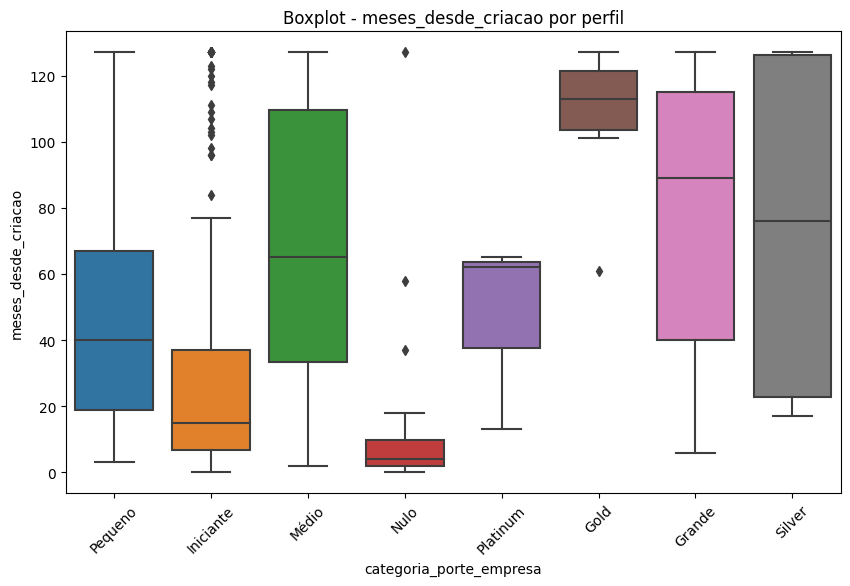

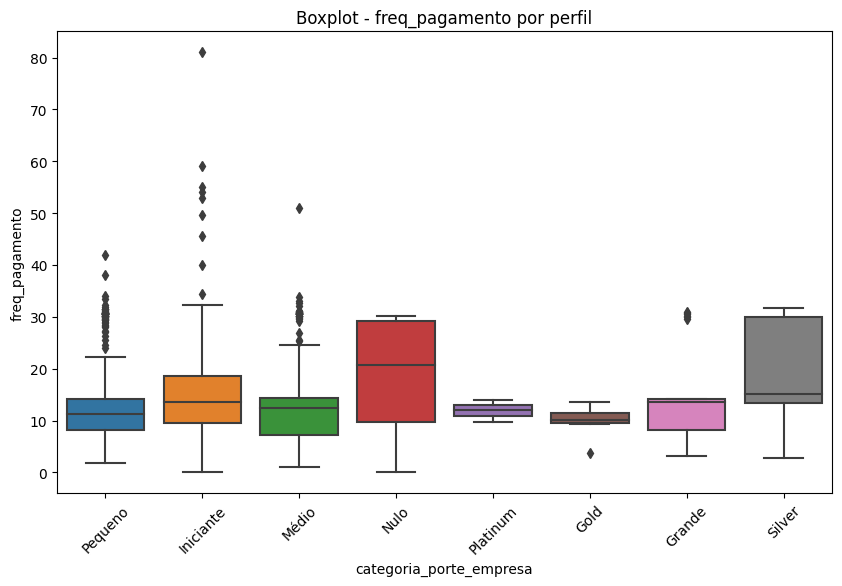

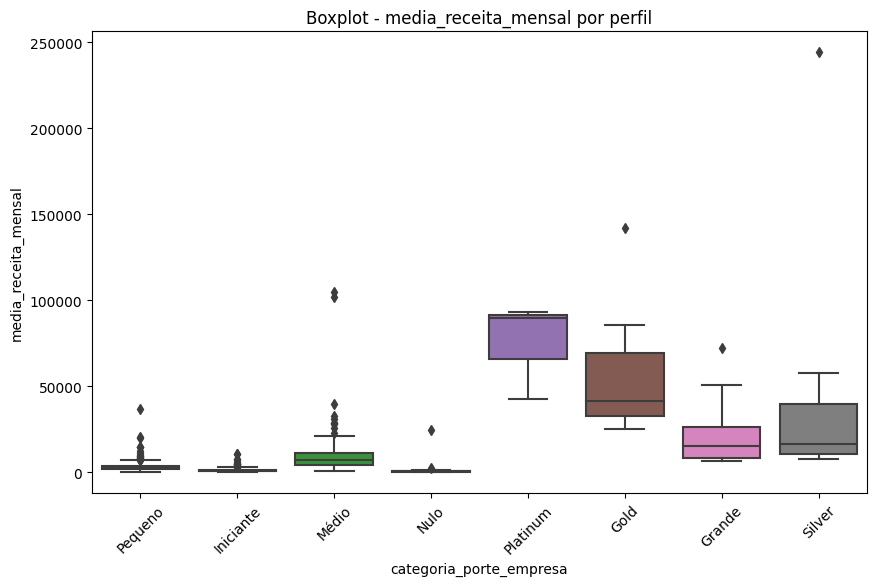

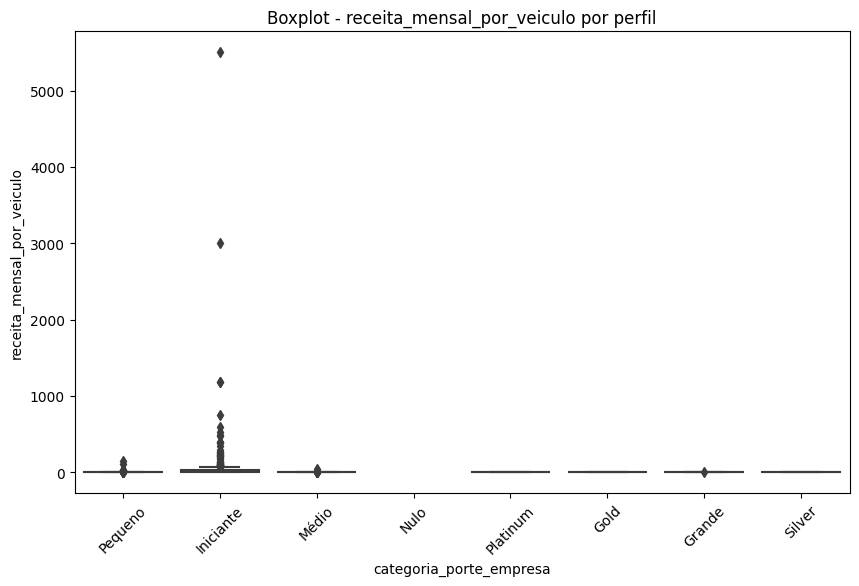

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis
variables = ['meses_desde_criacao', 'freq_pagamento', 'media_receita_mensal', 'receita_mensal_por_veiculo']

# Verificar se a coluna 'perfil' existe no DataFrame
if 'categoria_porte_empresa' in df_pandas.columns:
    for variable in variables:
        if variable in df_pandas.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='categoria_porte_empresa', y=variable, data=df_pandas)
            plt.title(f'Boxplot - {variable} por perfil')
            plt.xlabel('categoria_porte_empresa')
            plt.ylabel(variable)
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Column '{variable}' does not exist in the DataFrame.")
else:
    print("A coluna 'categoria_porte_empresa' não existe no DataFrame.")


/home/spark-c5c175e9-d96d-474d-8351-b3/.ipykernel/1634/command-3455235315902938-3476397362:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_pandas.corr()


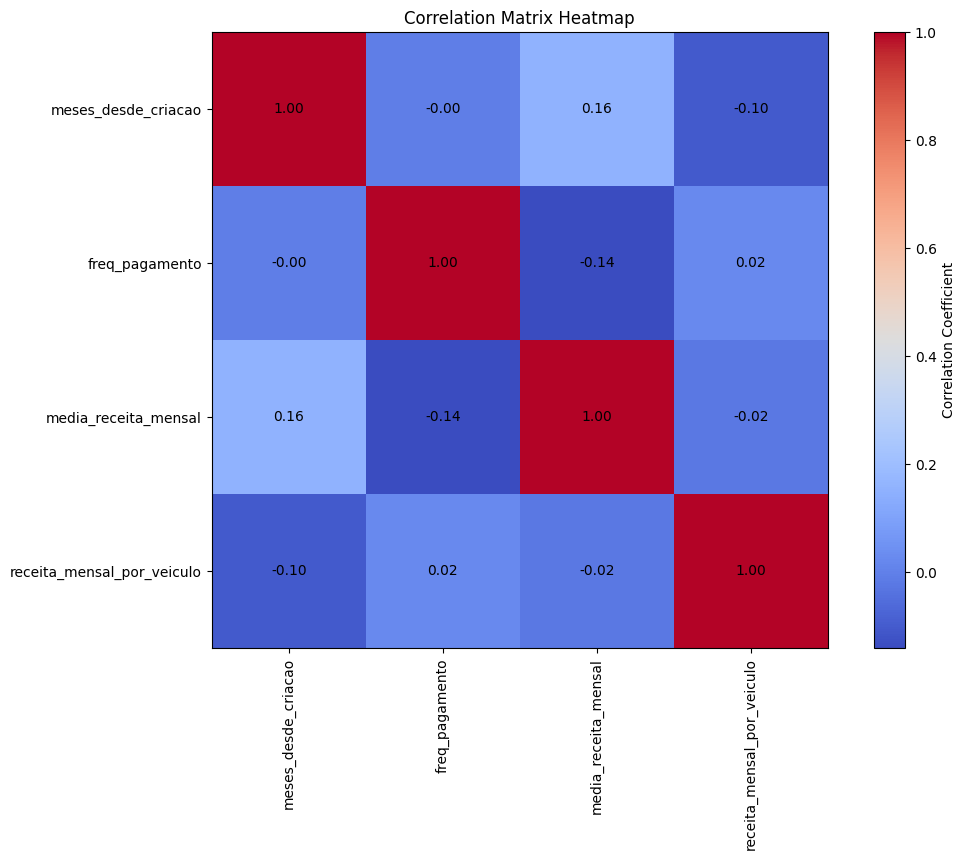

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que o df_pandas já esteja carregado com seus dados

# Gerar matriz de correlação
correlation_matrix = df_pandas.corr()

# Criar um gráfico de calor (heatmap) para a matriz de correlação
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Adicionar rótulos de dados
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()



### PCA

In [0]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_pandas is your DataFrame and it has been defined earlier
colunas_para_pca = ['meses_desde_criacao', 'freq_pagamento', 'media_receita_mensal', 'receita_mensal_por_veiculo']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
df_imputed = imputer.fit_transform(df_pandas[colunas_para_pca])
df_imputed = pd.DataFrame(df_imputed, columns=colunas_para_pca)

# Standardize the data (very important for PCA)
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA()
componentes_principais = pca.fit_transform(df_padronizado)

# Create a DataFrame with the principal component results
df_componentes = pd.DataFrame(componentes_principais, columns=[f'PC{i+1}' for i in range(len(colunas_para_pca))])

# Display the explained variance by each component
variancia_explicada = pca.explained_variance_ratio_
print(f'Variância explicada: {variancia_explicada}')
print(f'Variância acumulada: {pca.explained_variance_ratio_.cumsum()}')

# Display the principal components
display(df_componentes.head())

Variância explicada: [0.30938673 0.26092459 0.23421068 0.19547799]
Variância acumulada: [0.30938673 0.57031132 0.80452201 1.        ]


PC1,PC2,PC3,PC4
-0.8148407259889422,-1.3845249930260348,0.8518706284626902,0.5036160192363358
-0.09219236500553517,-0.1170631928973565,-0.048013947682915226,-0.2818281199889928
0.5972523100748286,0.4395610671126203,-0.34068664528674664,-0.1736199909328561
0.6358819785922556,-0.24117431744955467,0.2549914951493569,-0.22174680388202814
-0.2131395210460475,0.02205748201796131,-0.07612011903582674,-0.2986772499681736


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8604a2ecb0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

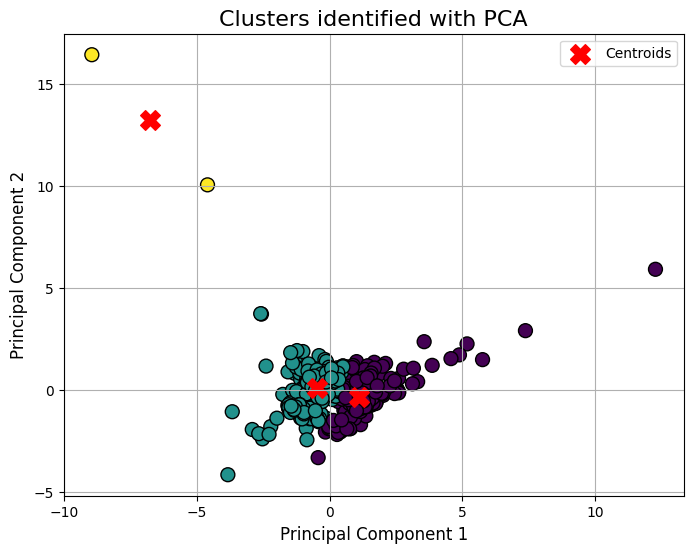

In [0]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import matplotlib.pyplot as plt

# Assuming df_pandas is already loaded
colunas_para_pca = ['meses_desde_criacao', 'freq_pagamento', 'media_receita_mensal', 'receita_mensal_por_veiculo']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
df_imputed = imputer.fit_transform(df_pandas[colunas_para_pca])

# Standardize the data
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df_imputed)

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_padronizado)

# Apply K-Means to identify clusters (adjust the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(pca_result)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', marker='o', s=100, edgecolor='k')
plt.title('Clusters identified with PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Add centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.legend()
plt.grid(True)
plt.show()

In [0]:
# Obter os loadings (componentes principais)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
                        index=colunas_para_pca)

# Mostrar os loadings
print("Loadings (Componentes Principais):")
print(loadings)


Loadings (Componentes Principais):
                                 PC1       PC2
meses_desde_criacao         0.565106 -0.404372
freq_pagamento             -0.407530 -0.625956
media_receita_mensal        0.642168  0.263537
receita_mensal_por_veiculo -0.319679  0.612544


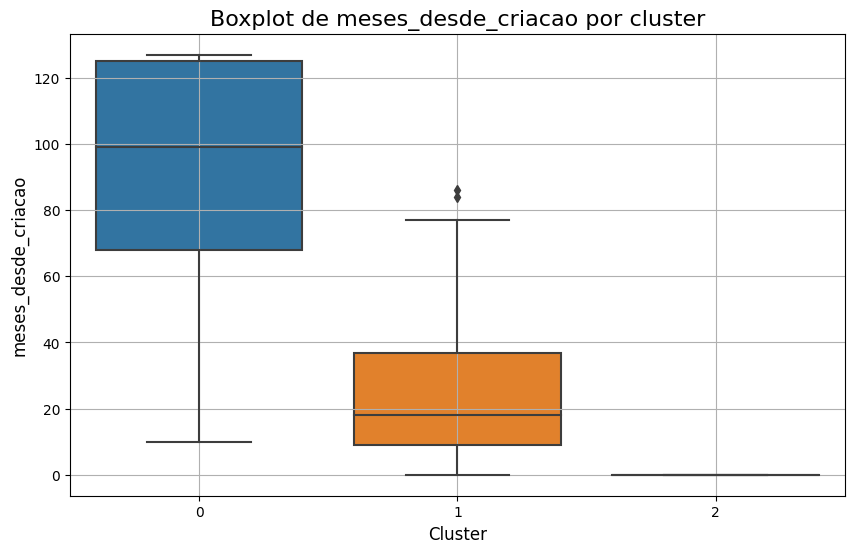

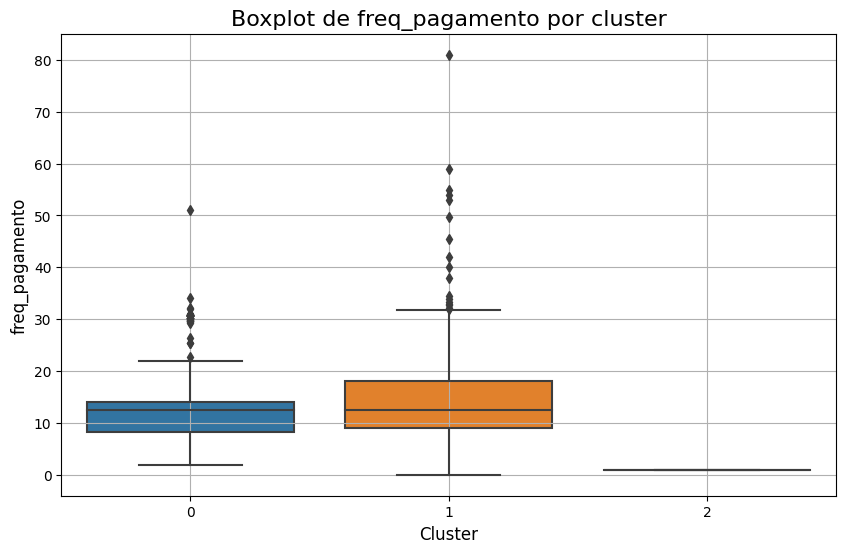

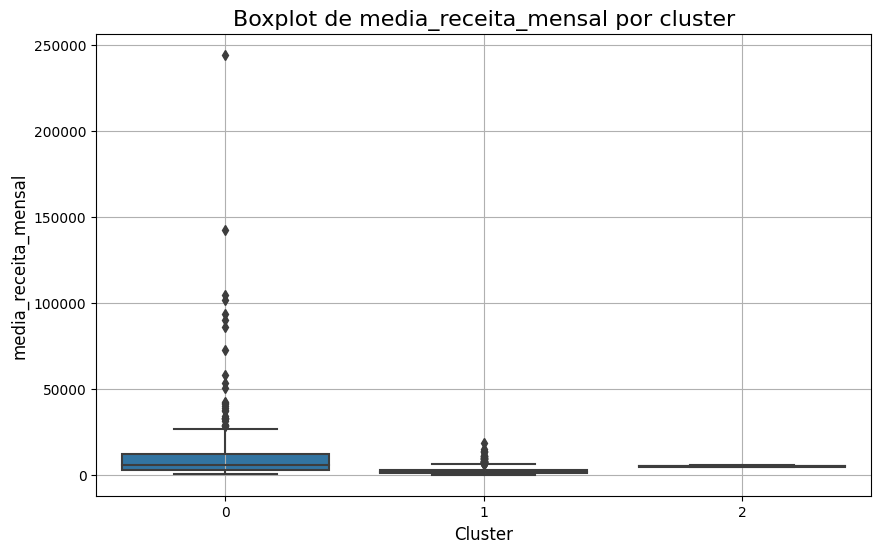

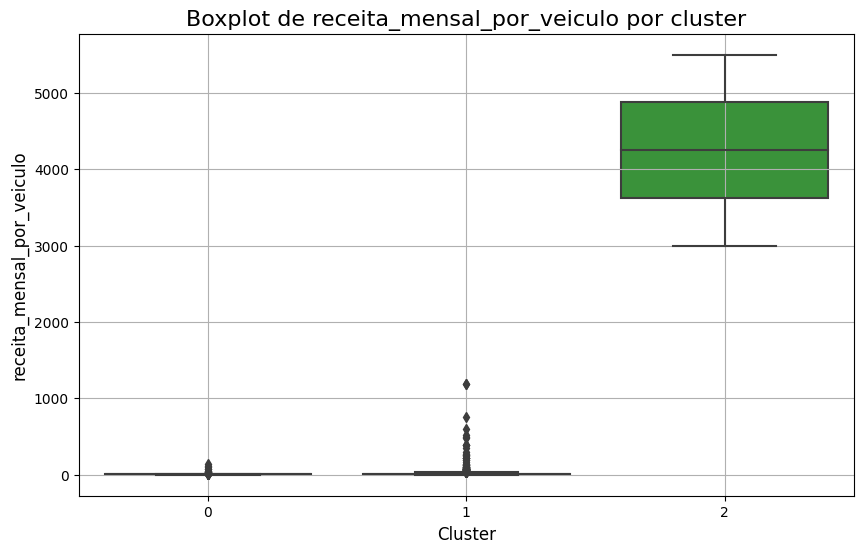

In [0]:
# Step 1: Adicionar os rótulos do cluster ao DataFrame original
df_pandas['cluster'] = clusters

# Step 2: Plotar o boxplot das variáveis por cluster
import seaborn as sns

# Plotar o boxplot para cada variável
for coluna in colunas_para_pca:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=coluna, data=df_pandas)
    plt.title(f'Boxplot de {coluna} por cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    plt.grid(True)
    plt.show()

Tabela cruzada para perfil:
cluster         0    1  2
perfil                   
ASSOCIACAO     56   63  0
CFTV           31   38  0
FROTA           9   45  0
RASTREAMENTO  210  549  2
REVENDA         3    3  0




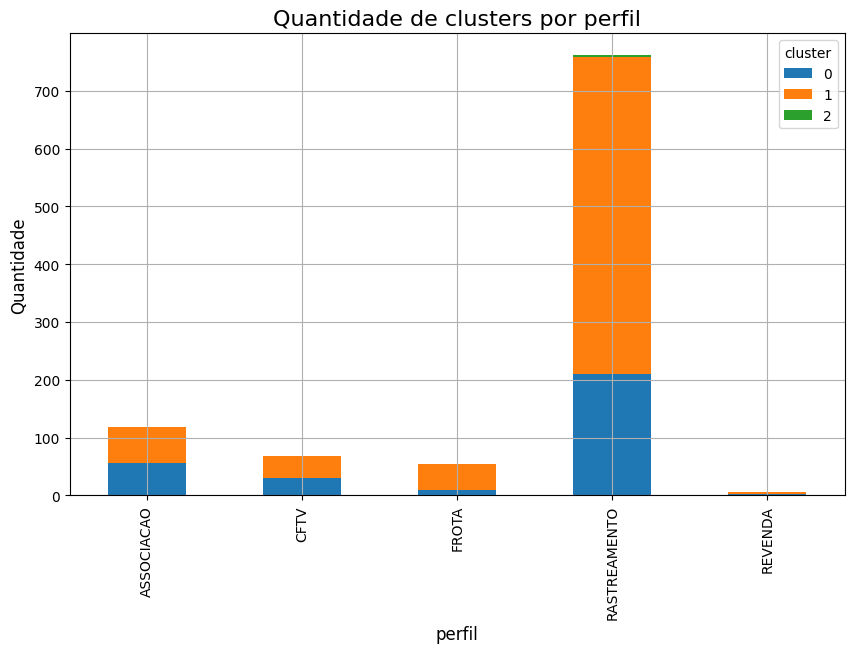

Tabela cruzada para categoria_porte_empresa:
cluster                    0    1  2
categoria_porte_empresa             
Gold                       7    0  0
Grande                    24    3  0
Iniciante                 34  360  2
Médio                    120   63  0
Nulo                       2   22  0
Pequeno                  110  247  0
Platinum                   3    0  0
Silver                     9    3  0




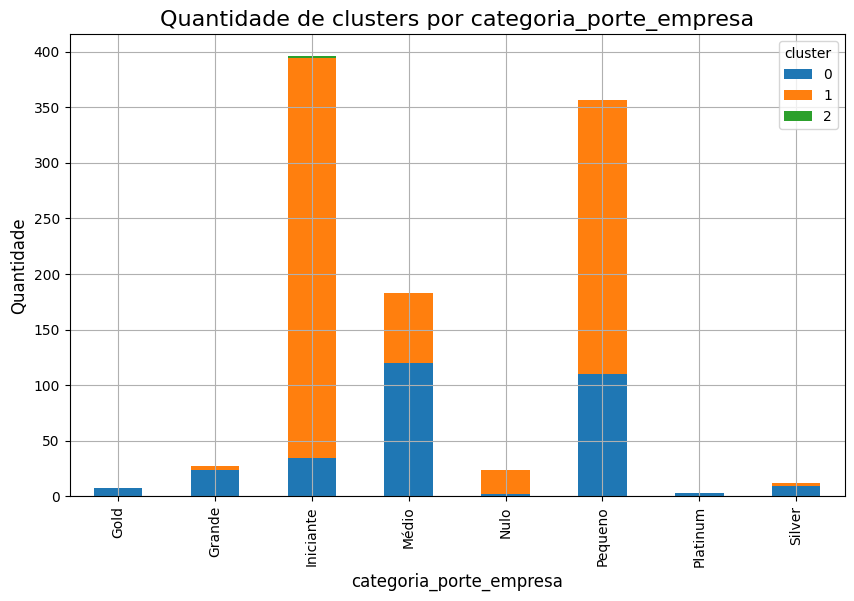

Tabela cruzada para classificacao:
cluster          0    1  2
classificacao             
A              230   36  0
B               72  228  0
C                7  434  2




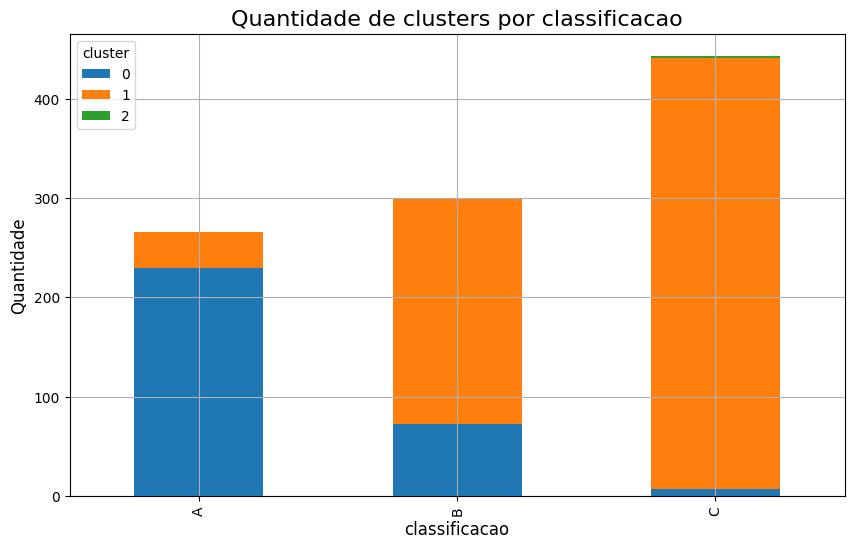

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Verificar as variáveis categóricas
variaveis_categoricas = ['perfil', 'categoria_porte_empresa', 'classificacao']  # Substitua pelas suas variáveis

# Step 2: Criar uma tabela cruzada mostrando a quantidade de clusters por cada variável categórica
for var in variaveis_categoricas:
    crosstab_result = pd.crosstab(df_pandas[var], df_pandas['cluster'])
    
    # Exibir a tabela
    print(f'Tabela cruzada para {var}:')
    print(crosstab_result)
    print('\n')

    # Plotar o gráfico de barras empilhadas para cada variável categórica
    crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Quantidade de clusters por {var}', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.grid(True)
    plt.show()

Tabela cruzada de percentuais para perfil:
cluster               0          1         2
perfil                                      
ASSOCIACAO    47.058824  52.941176  0.000000
CFTV          44.927536  55.072464  0.000000
FROTA         16.666667  83.333333  0.000000
RASTREAMENTO  27.595269  72.141919  0.262812
REVENDA       50.000000  50.000000  0.000000




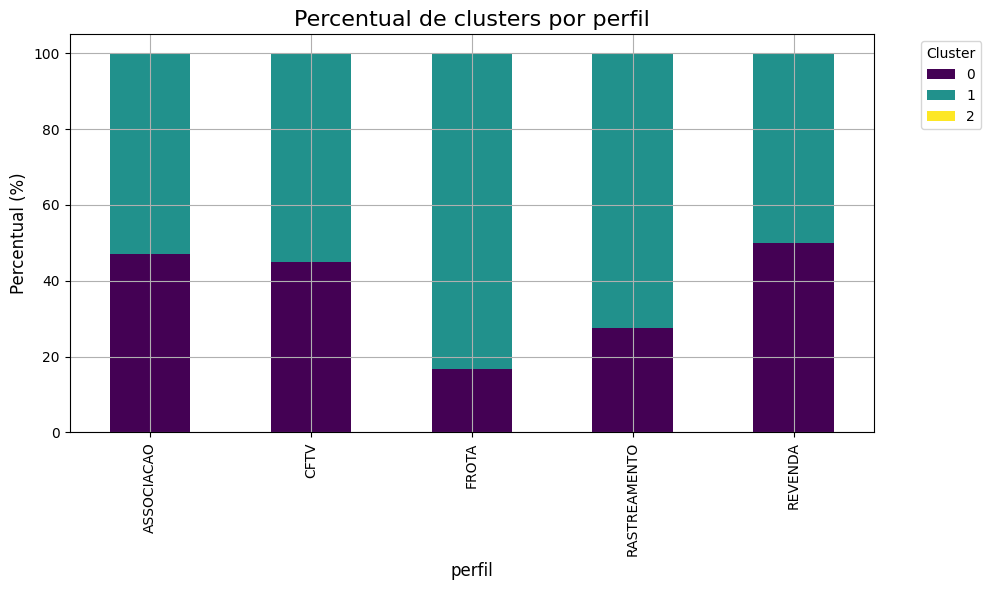

Tabela cruzada de percentuais para categoria_porte_empresa:
cluster                           0          1         2
categoria_porte_empresa                                 
Gold                     100.000000   0.000000  0.000000
Grande                    88.888889  11.111111  0.000000
Iniciante                  8.585859  90.909091  0.505051
Médio                     65.573770  34.426230  0.000000
Nulo                       8.333333  91.666667  0.000000
Pequeno                   30.812325  69.187675  0.000000
Platinum                 100.000000   0.000000  0.000000
Silver                    75.000000  25.000000  0.000000




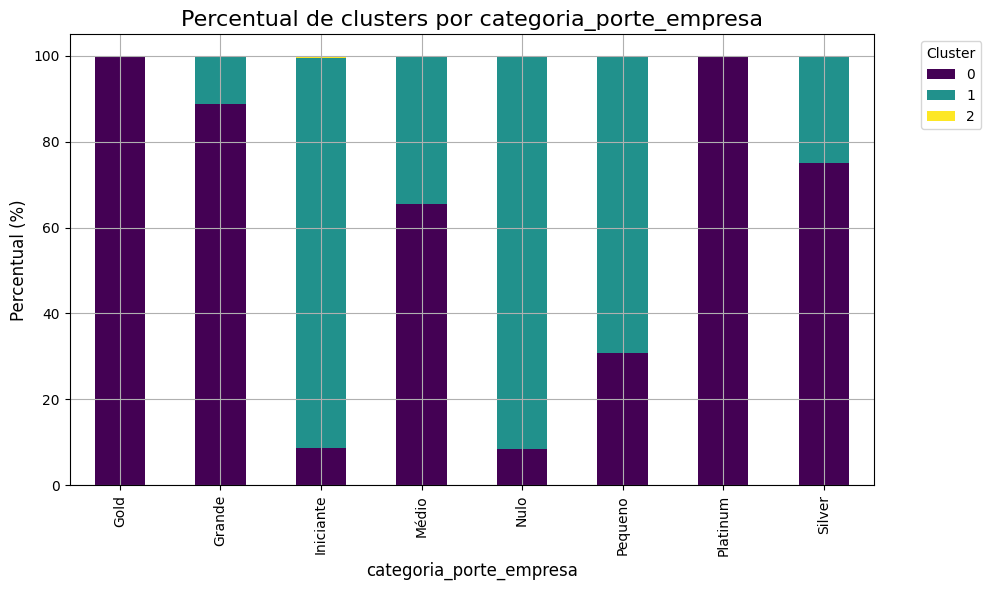

Tabela cruzada de percentuais para classificacao:
cluster                0          1         2
classificacao                                
A              86.466165  13.533835  0.000000
B              24.000000  76.000000  0.000000
C               1.580135  97.968397  0.451467




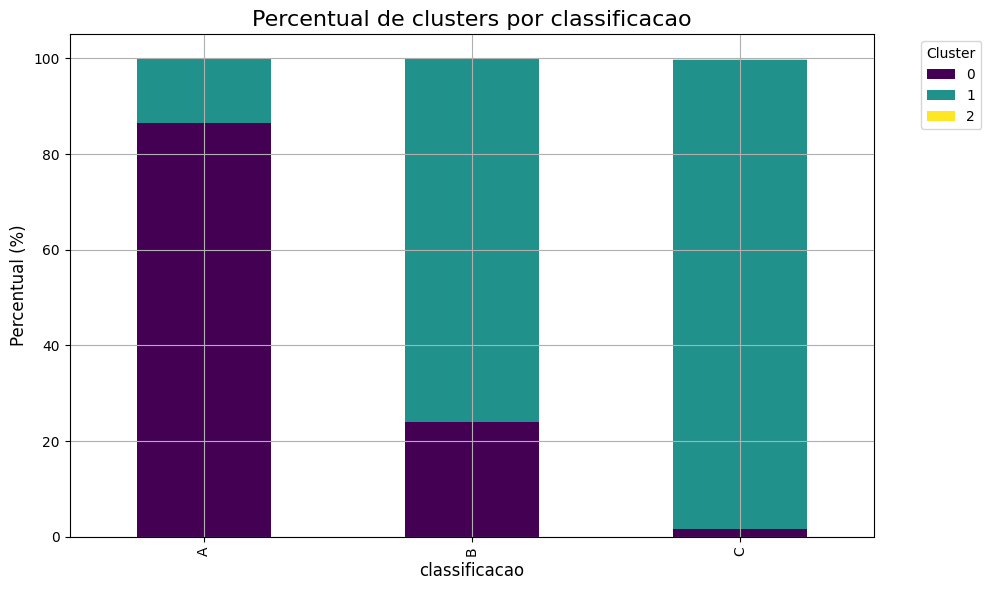

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Verificar as variáveis categóricas
variaveis_categoricas = ['perfil', 'categoria_porte_empresa', 'classificacao']  # Substitua pelas suas variáveis

# Step 2: Criar uma tabela cruzada mostrando a quantidade de clusters por cada variável categórica
for var in variaveis_categoricas:
    # Tabela cruzada normalizada (percentual por linha)
    crosstab_result = pd.crosstab(df_pandas[var], df_pandas['cluster'], normalize='index') * 100
    
    # Exibir a tabela de percentuais
    print(f'Tabela cruzada de percentuais para {var}:')
    print(crosstab_result)
    print('\n')

    # Plotar o gráfico de barras empilhadas em percentual
    crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
    plt.title(f'Percentual de clusters por {var}', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Percentual (%)', fontsize=12)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico
    plt.grid(True)
    plt.tight_layout()  # Ajustar o layout
    plt.show()


In [0]:
# Quantidade total de clusters no DataFrame
quantidade_clusters = df_pandas['cluster'].value_counts()

# Exibir a quantidade total de clusters
print("Quantidade total de clusters no DataFrame:")
print(quantidade_clusters)


Quantidade total de clusters no DataFrame:
1    698
0    309
2      2
Name: cluster, dtype: int64
